# OpenCV Yolo


- Run this above [code](https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/) on your laptop or Colab.
- Take an image of yourself, holding another object which is there in COCO data set (search for COCO classes to learn).
- Run this image through the code above.
- Upload the link to GitHub implementation of this.
- Upload the annotated image by YOLO. 

In [2]:
! git clone https://github.com/amitkml/Transformer-DeepLearning

Cloning into 'Transformer-DeepLearning'...
remote: Enumerating objects: 1138, done.
remote: Counting objects: 100% (1138/1138), done.
remote: Compressing objects: 100% (822/822), done.
remote: Total 1138 (delta 670), reused 706 (delta 298), pack-reused 0
Receiving objects: 100% (1138/1138), 29.47 MiB | 30.36 MiB/s, done.
Resolving deltas: 100% (670/670), done.


In [3]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-12-19 08:59:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  61.2MB/s    in 4.1s    

2021-12-19 08:59:40 (57.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
!cp /content/Transformer-DeepLearning/Session-11-Yolo-ObjDetection/OpenCV_YOLOV3/coco.names coco.names
!cp /content/Transformer-DeepLearning/Session-11-Yolo-ObjDetection/OpenCV_YOLOV3/yolov3.cfg yolov3.cfg 

## use YOLO with Opencv

In [1]:
# We import the classes:
import cv2
import numpy as np

We load the algorythm. The run the algorythm we need three files:

    Weight file: it’s the trained model, the core of the algorythm to detect the objects.
    Cfg file: it’s the configuration file, where there are all the settings of the algorythm.
    Name files: contains the name of the objects that the algorythm can detect.

In [7]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [8]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

We then load the image where we want to perform the object detection and we also get its width and height.

In [9]:
!cp /content/Transformer-DeepLearning/Session-11-Yolo-ObjDetection/OpenCV_YOLOV3/input/bag_scissors.jpg bag_scissors.jpg

!cp /content/Transformer-DeepLearning/Session-11-Yolo-ObjDetection/OpenCV_YOLOV3/input/laptop.JPG laptop.JPG

!cp /content/Transformer-DeepLearning/Session-11-Yolo-ObjDetection/OpenCV_YOLOV3/input/room_ser.jpg room_ser.jpg

In [11]:
# We then load the image where we want to perform the object detection and we also get its width and height.
# Loading image
img = cv2.imread("room_ser.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

height, width, channels

(288, 512, 3)

Keep in mind that we can’t use right away the full image on the network, but first we need it to convert it to blob. Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:

    320×320 it’s small so less accuracy but better speed
    609×609 it’s bigger so high accuracy and slow speed
    416×416 it’s in the middle and you get a bit of both.

In [12]:
# Detecting objects
# Outs is an array that conains all the informations about objects detected, their position and the confidence about the detection.
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

At this point the detection is done, and we only need to show the result on the screen.
- We then loop trough the outs array, we calculate the confidence and we choose a confidence threshold.
- we set a threshold confidence of 0.5, if it’s greater we consider the object correctly detected, otherwise we skip it.
- The threshold goes from 0 to 1. The closer to 1 the greater is the accuracy of the detection, while the closer to 0 the less is the accuracy but also it’s greater the number of the objects detected.

In [13]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

When we perform the detection, it happens that we have more boxes for the same object, so we should use another function to remove this “noise”.
It’s called Non maximum suppresion

In [14]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

We finally extract all the informations and show them on the screen.

    Box: contain the coordinates of the rectangle sorrounding the object detected.
    Label: it’s the name of the object detected
    Confidence: the confidence about the detection from 0 to 1.

In [17]:
from google.colab.patches import cv2_imshow

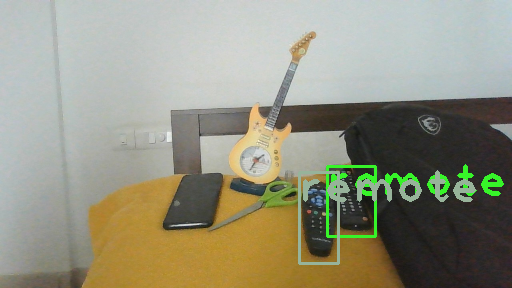

In [20]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [21]:
def show_output(img, net):
  img = cv2.imread(img)
  img = cv2.resize(img, None, fx=0.4, fy=0.4)
  height, width, channels = img.shape
  height, width, channels

  # Detecting objects
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)
# Showing informations on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              # Object detected
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)
              # Rectangle coordinates
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)
              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  font = cv2.FONT_HERSHEY_PLAIN
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          color = colors[i]
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
          cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
  
  cv2_imshow(img)

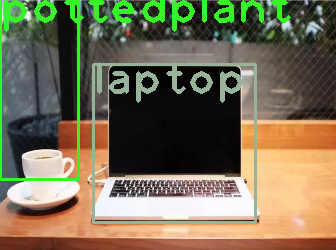

In [22]:
show_output('laptop.JPG',net)

In [25]:
!ls

bag_scissors.jpg  olov3.cfg	Transformer-DeepLearning
coco.names	  room_ser.jpg	yolov3.cfg
laptop.JPG	  sample_data	yolov3.weights


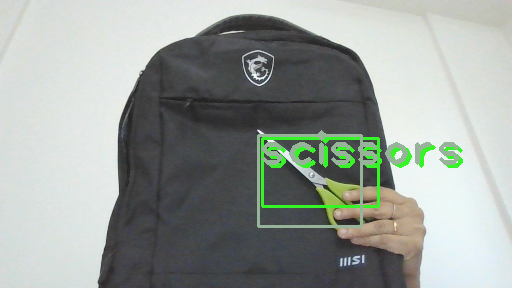

In [26]:
show_output('bag_scissors.jpg',net)